In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 500

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('hyperbolic', to_data_frame=True)

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [6]:
results['result.integration_scores'].iloc[0]

,ASW_label,ASW_label/batch,PCR_batch,graph_conn,ebm,knn
0,0.627888,0.864391,0.514546,0.849705,0.297955,0.888071


In [7]:
results['result.f1-score'] = results['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
for score in list(results['result.integration_scores'].loc[0].columns):
    results[f'result.{score}'] = results['result.integration_scores'].apply(
        lambda x: x[score]
    )

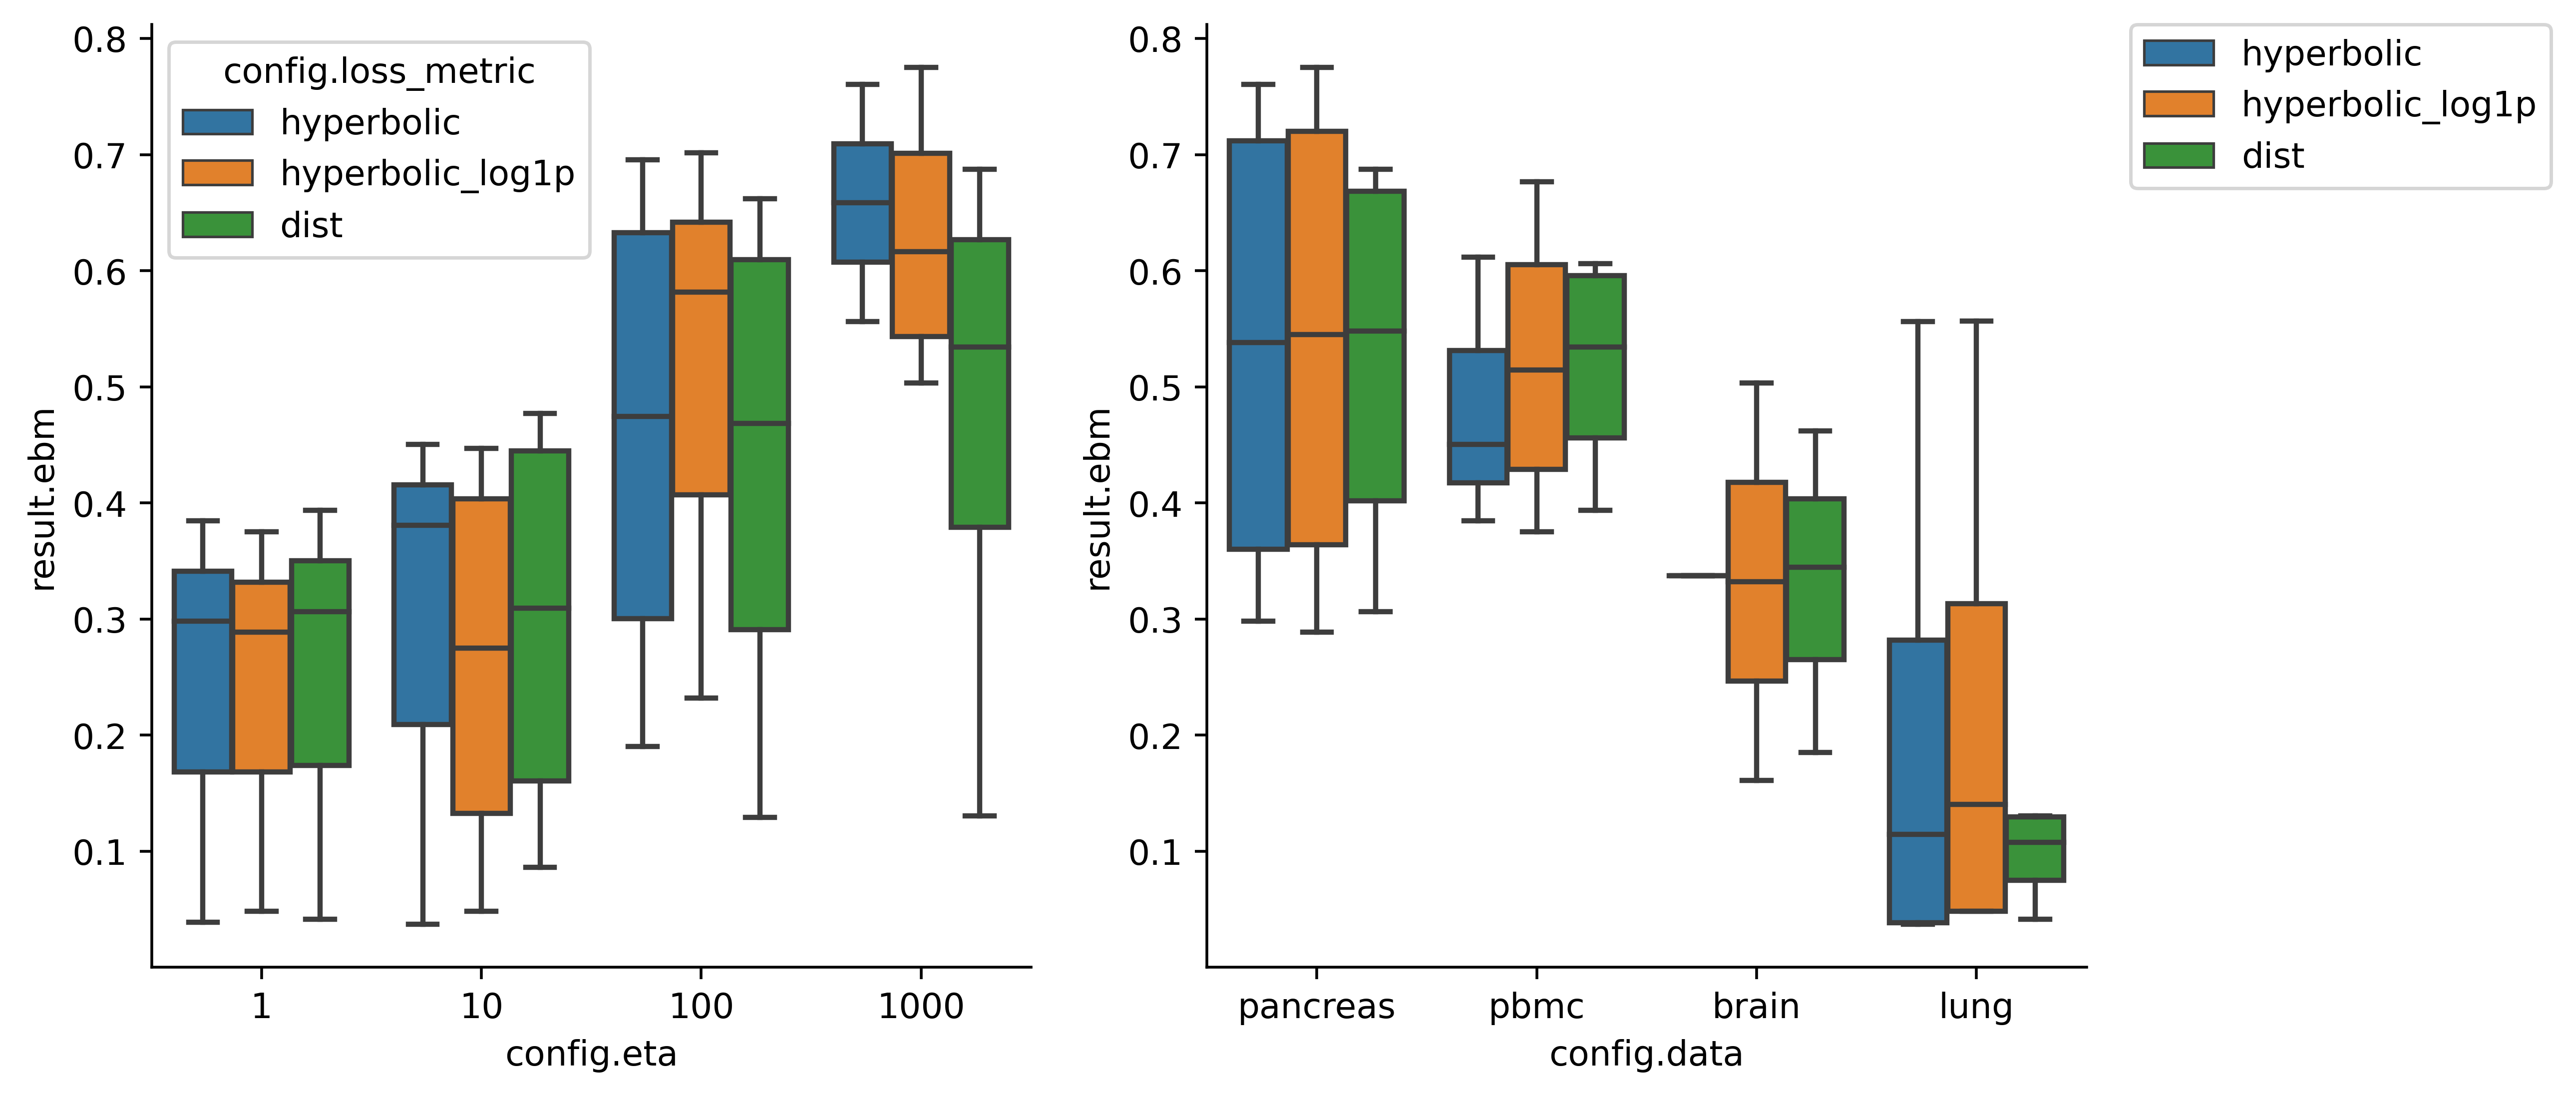

In [12]:
RESULT = 'ebm'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

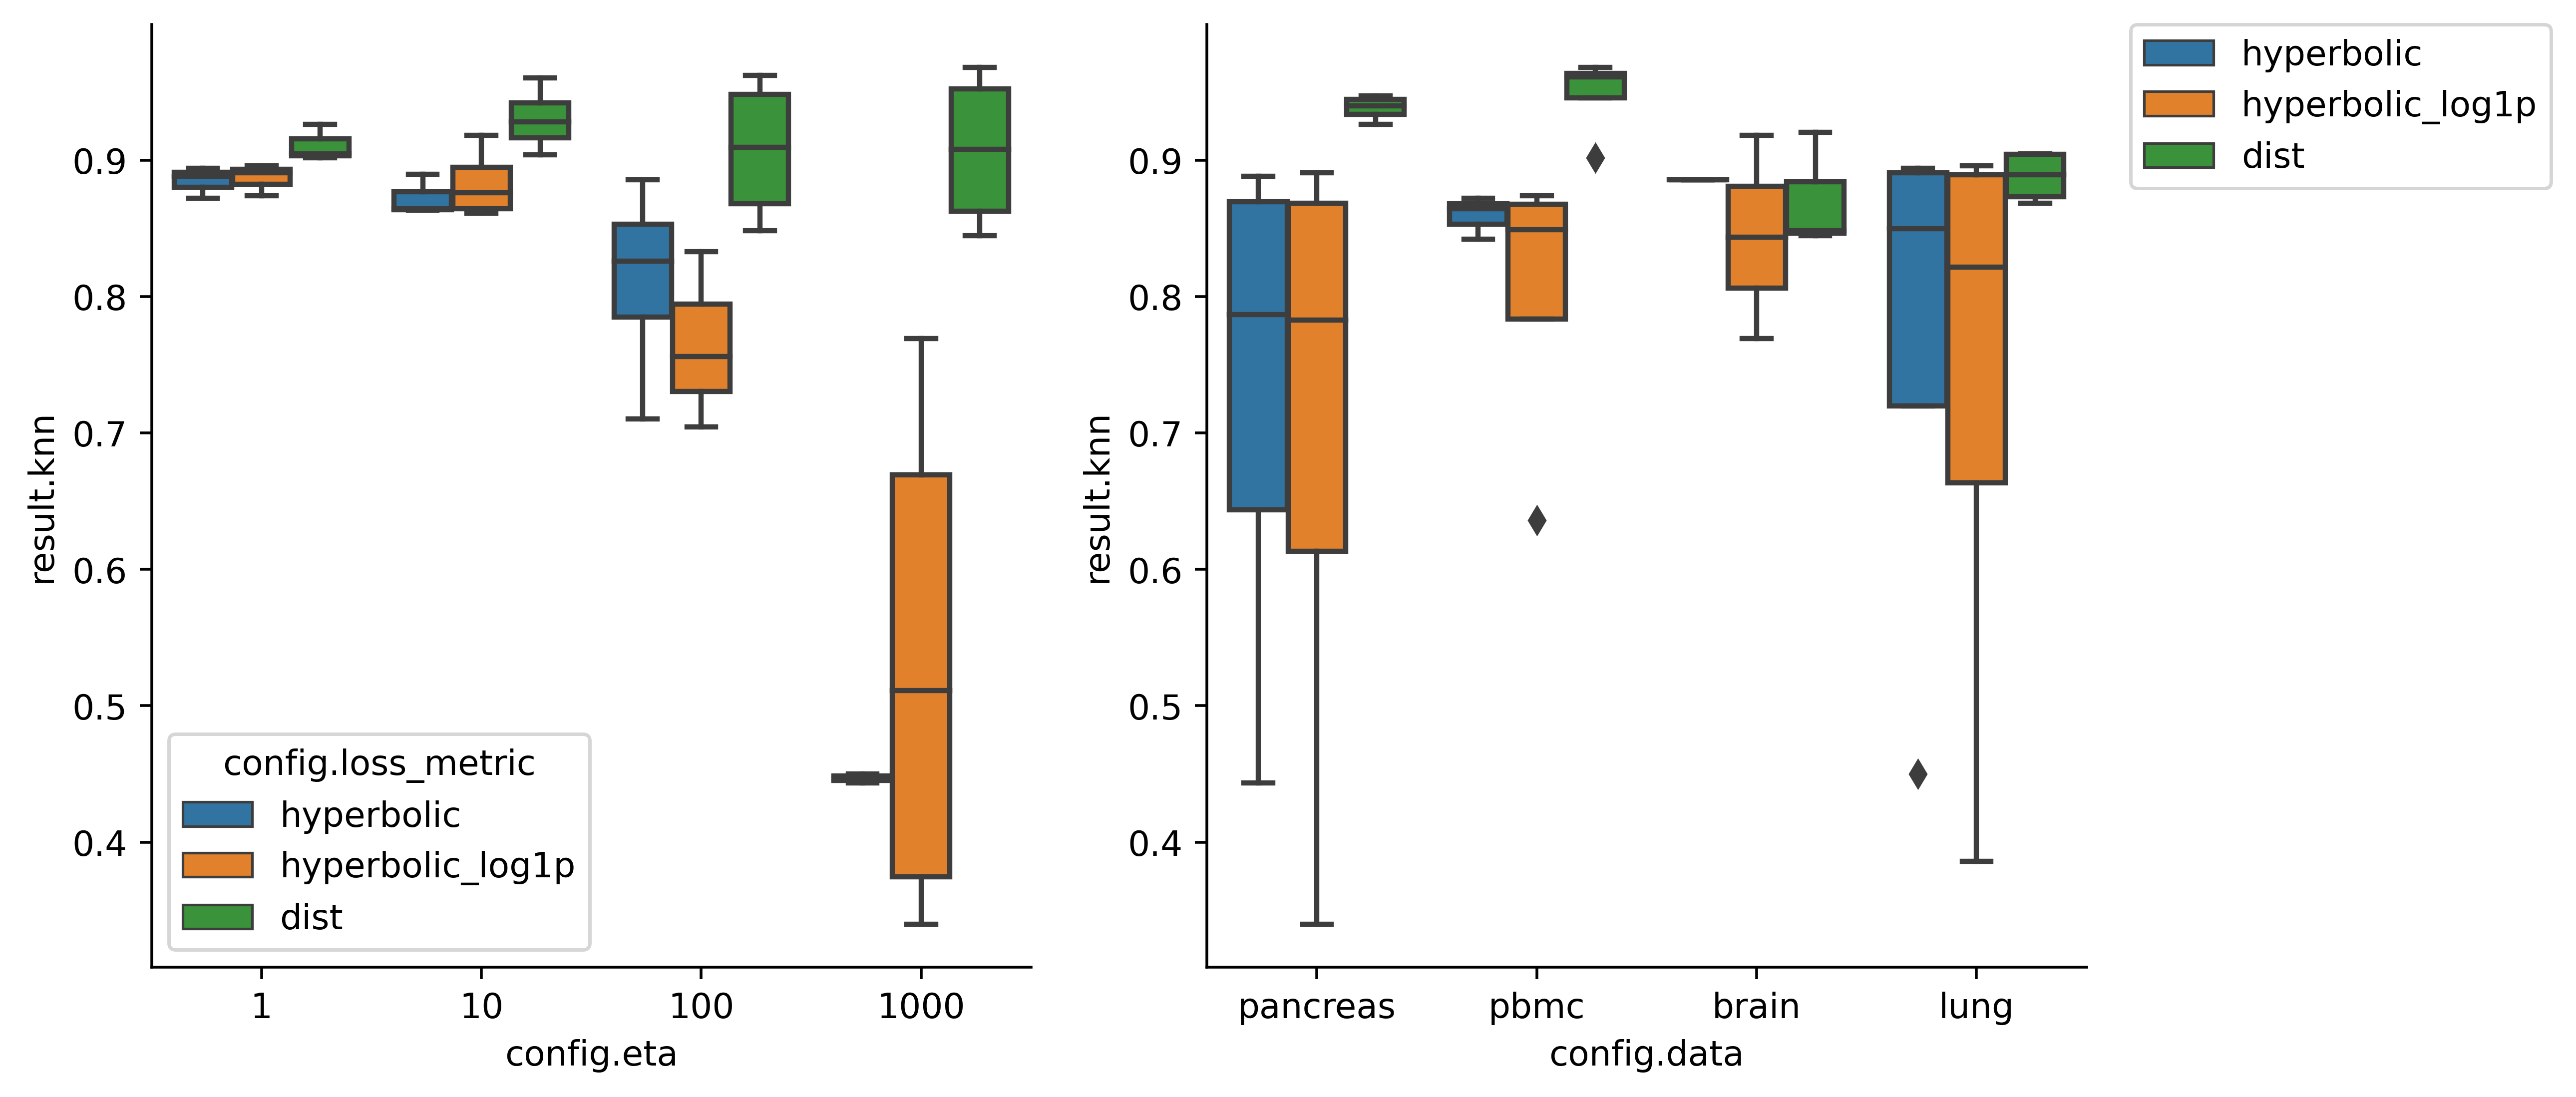

In [13]:
RESULT = 'knn'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

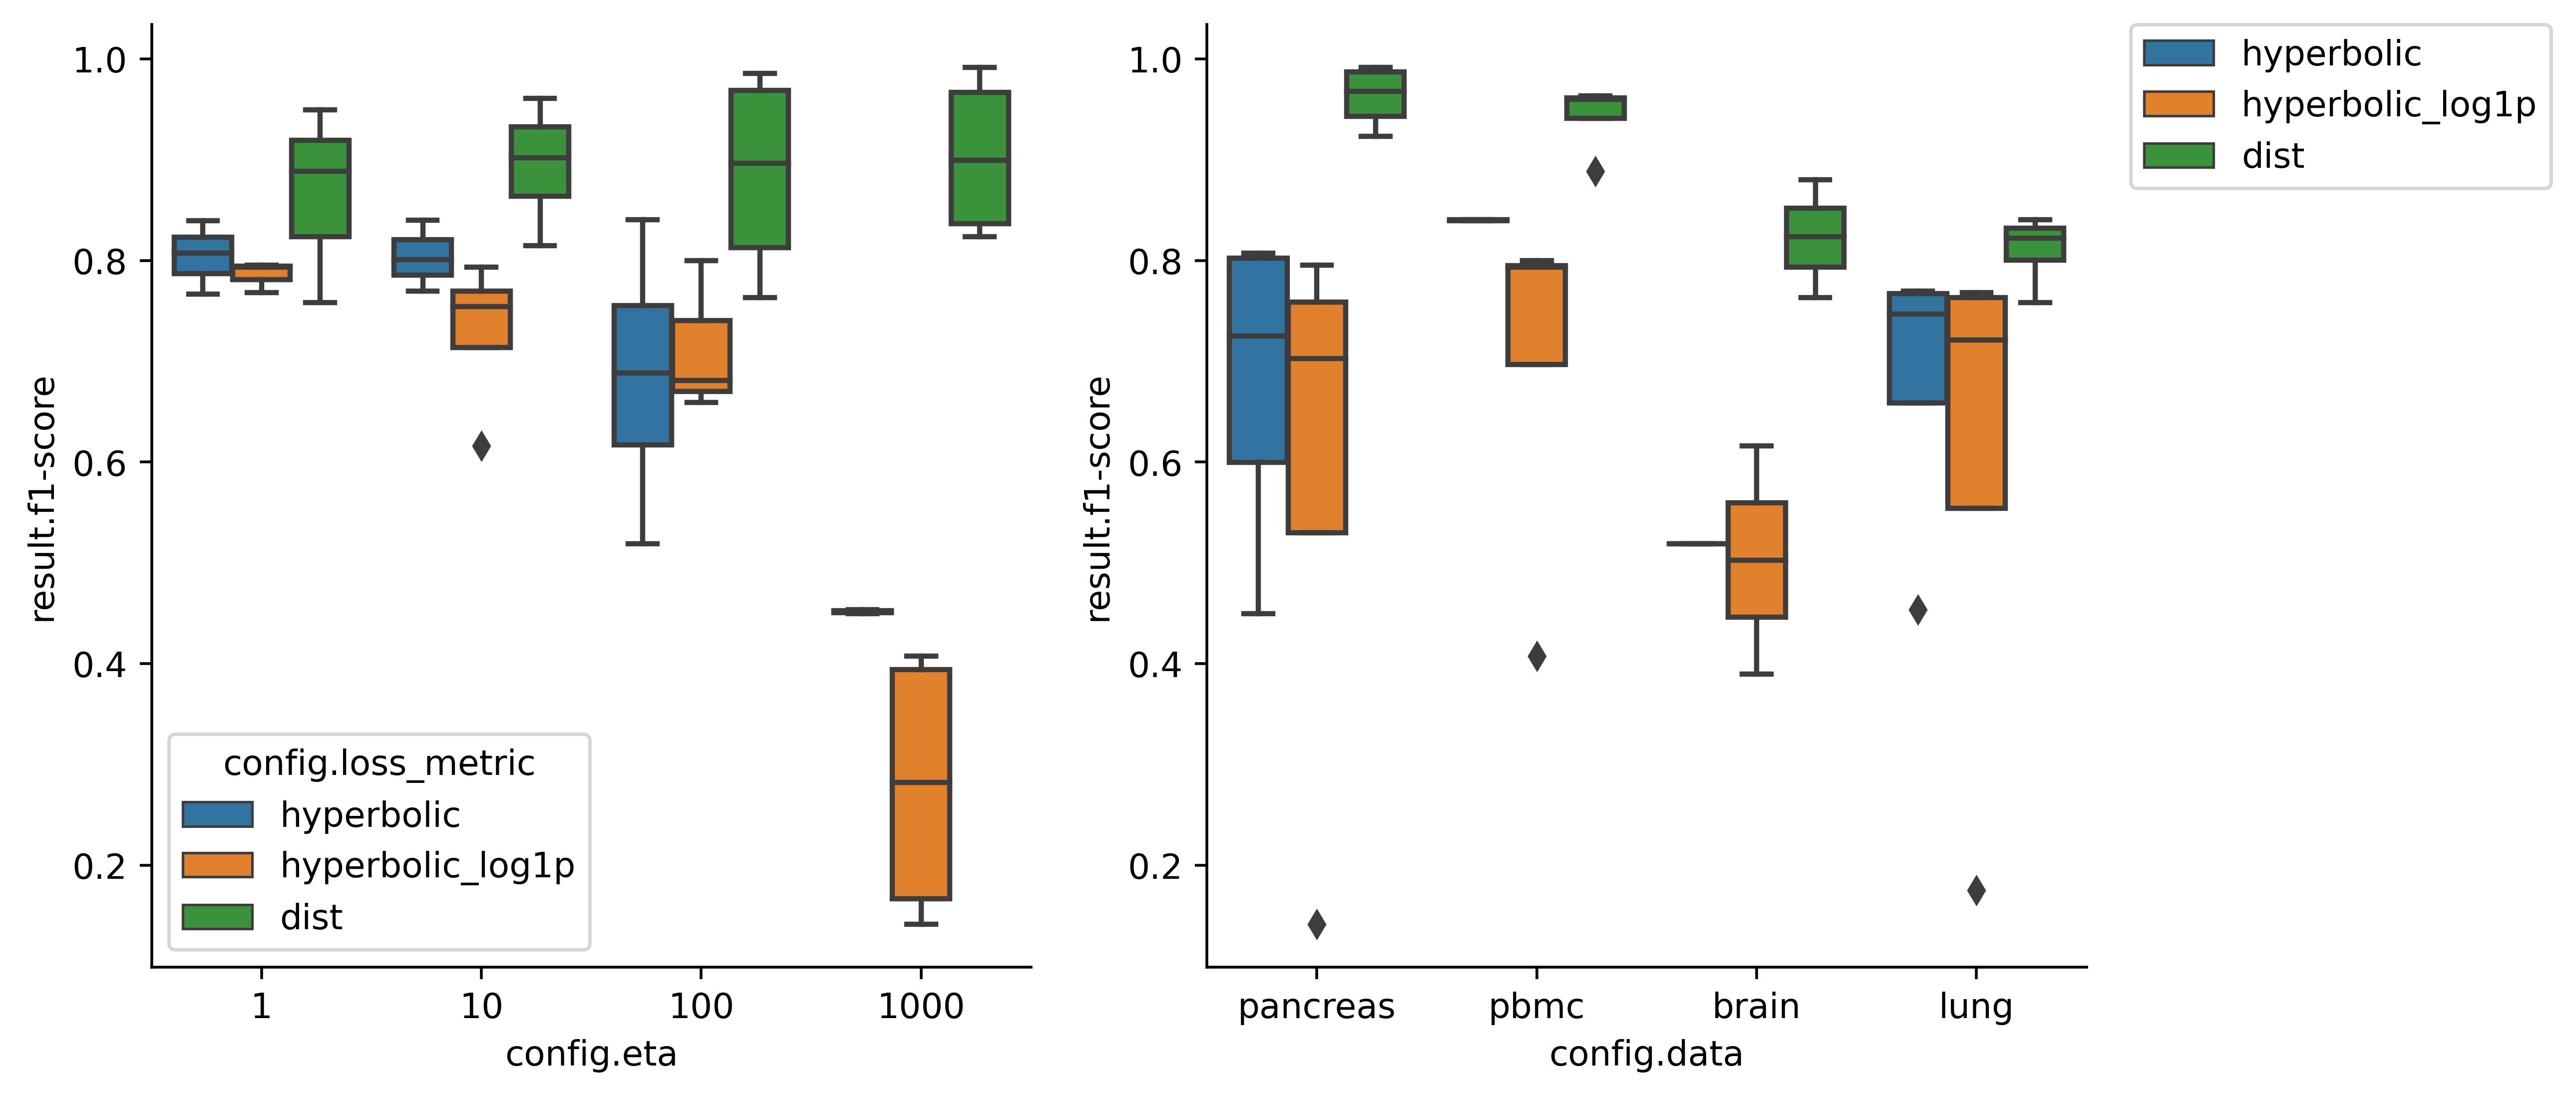

In [14]:
RESULT = 'f1-score'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

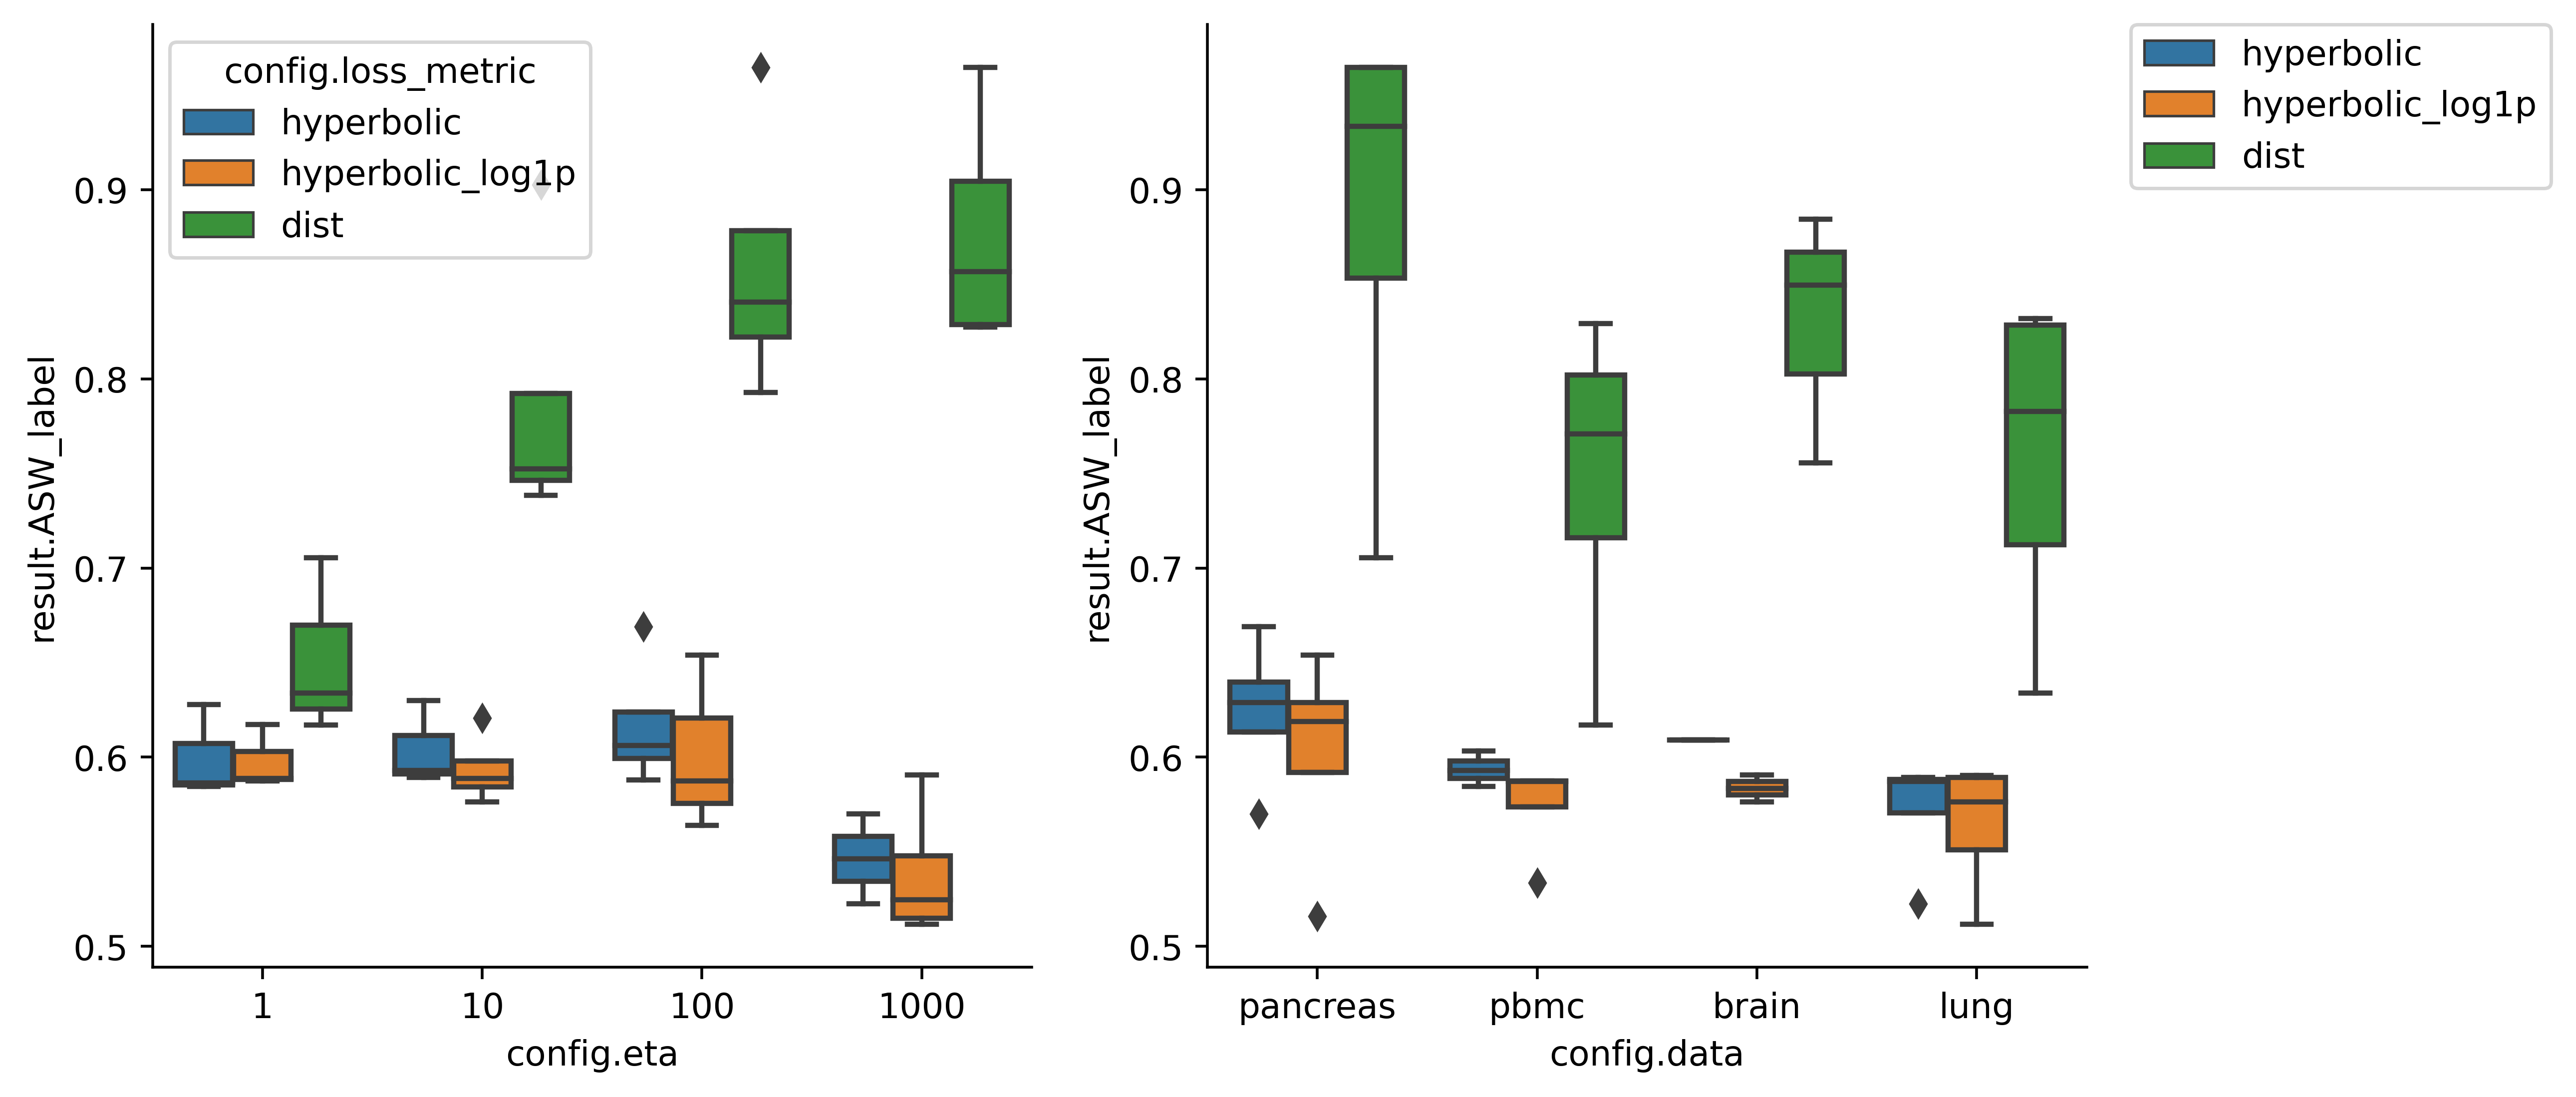

In [15]:
RESULT = 'ASW_label'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

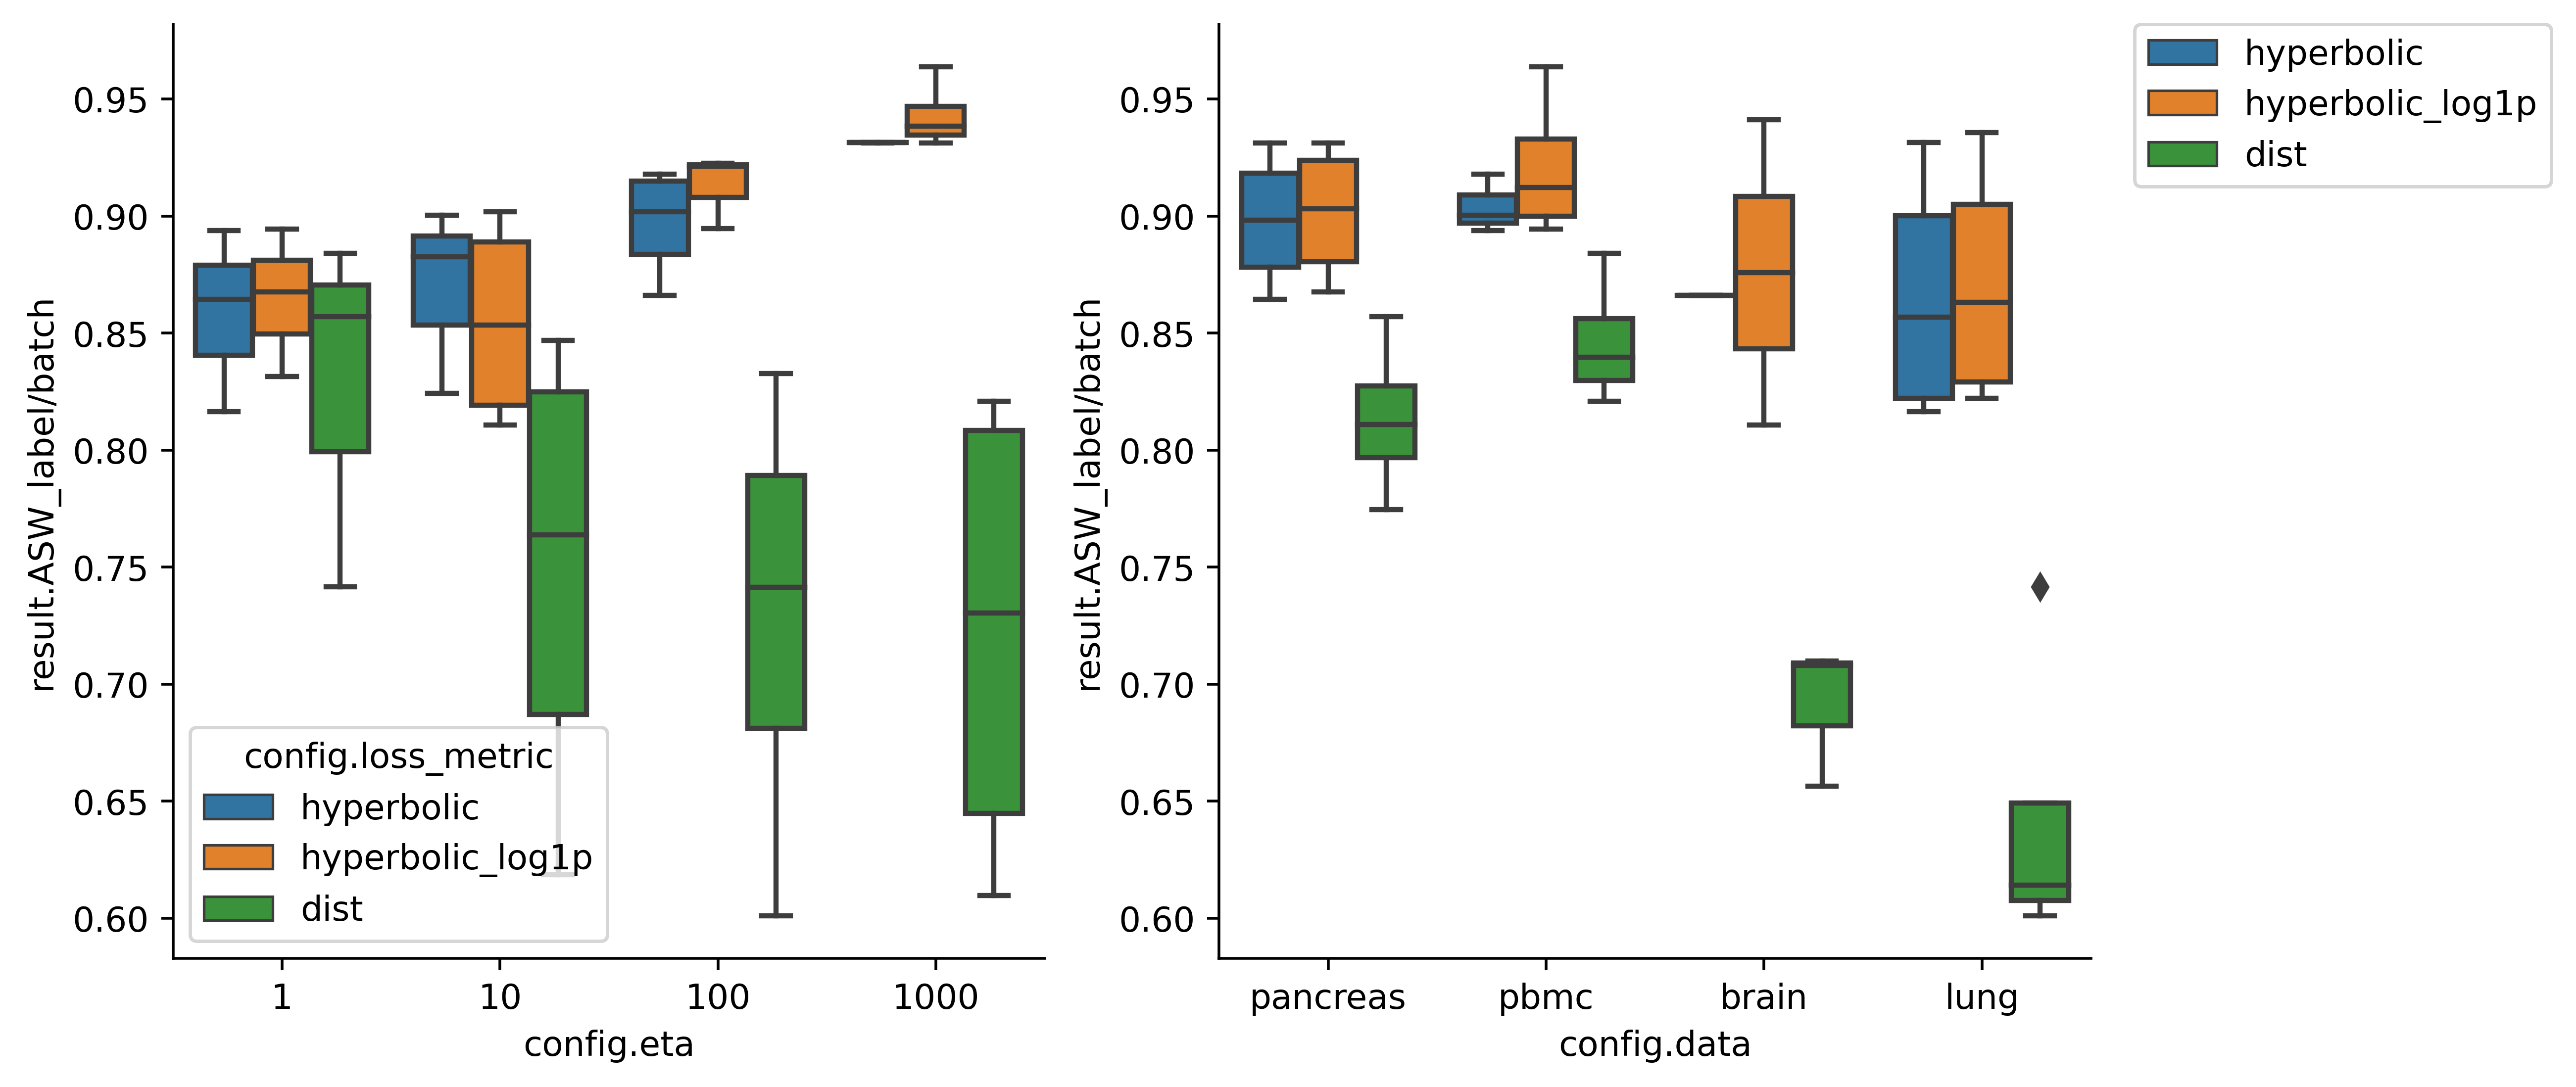

In [16]:
RESULT = 'ASW_label/batch'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

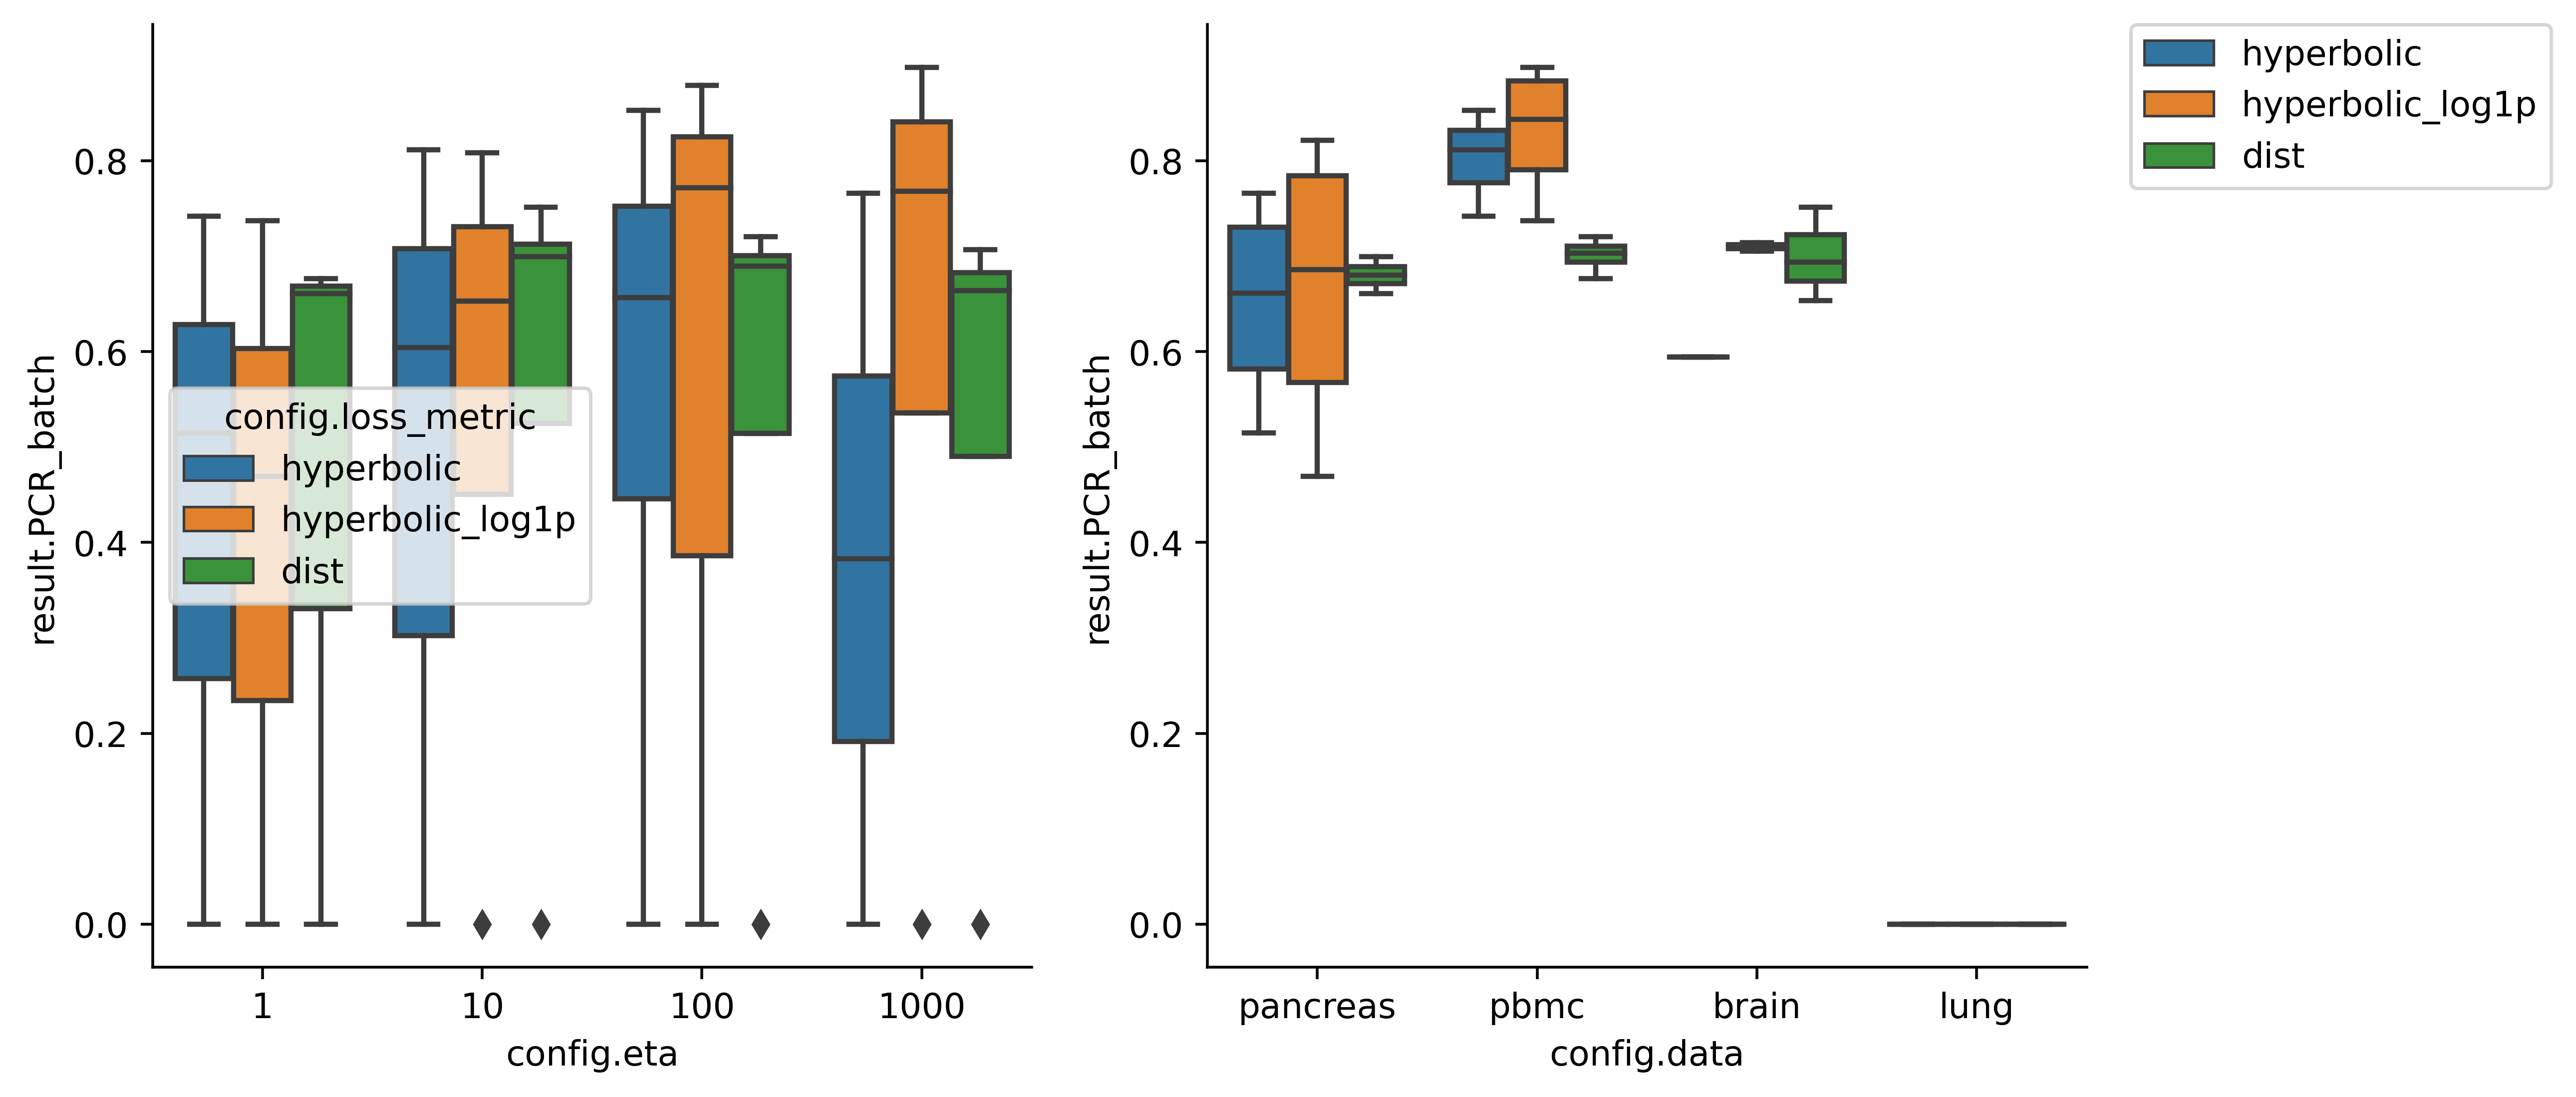

In [17]:
RESULT = 'PCR_batch'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

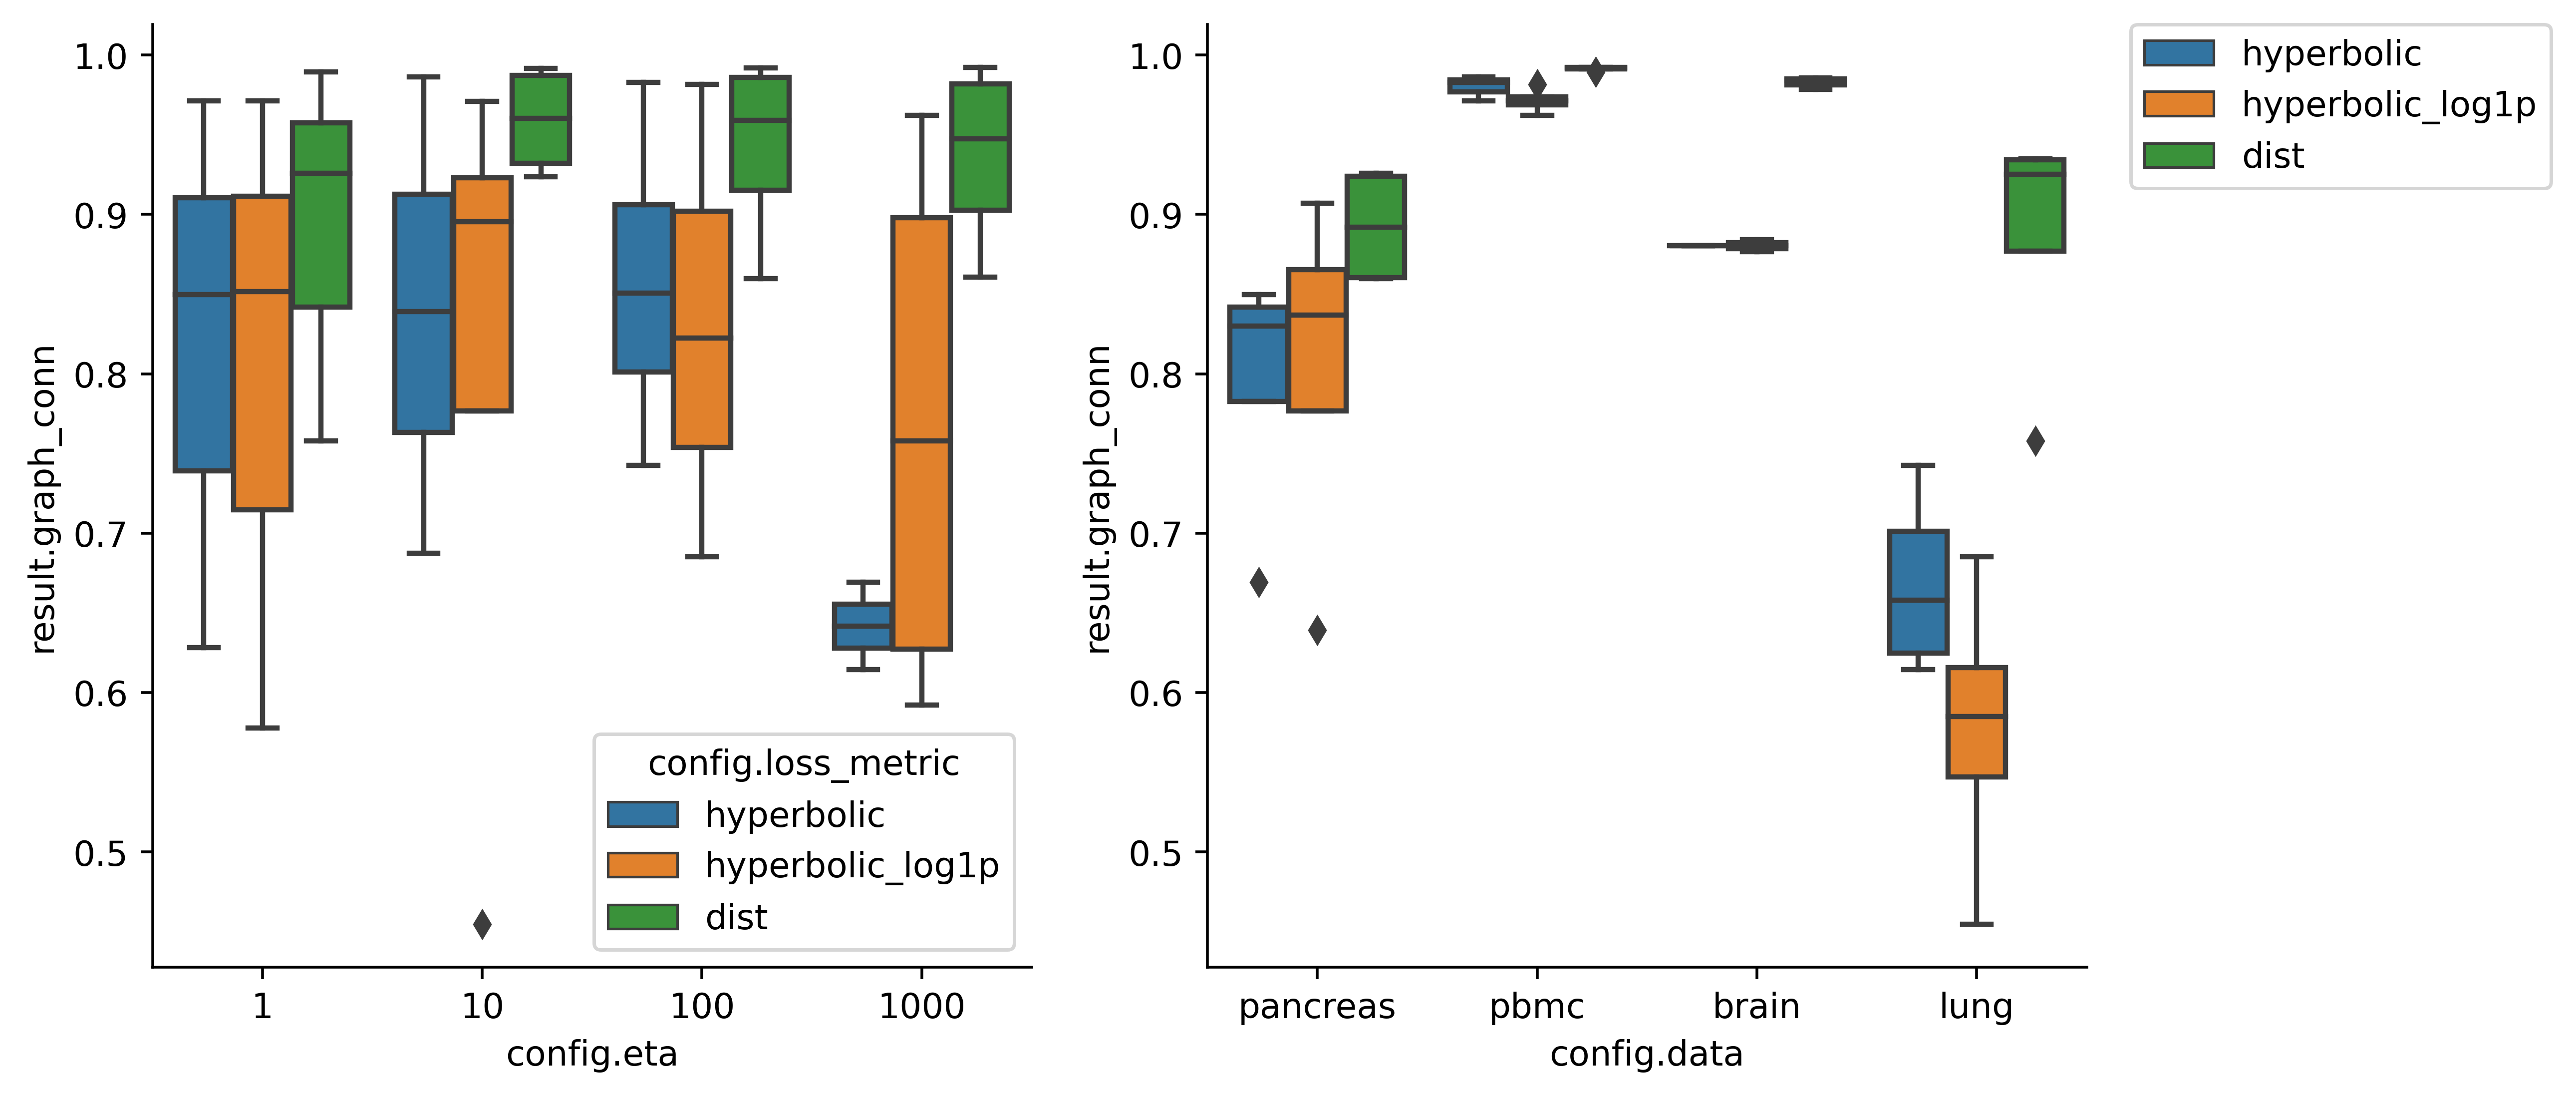

In [18]:
RESULT = 'graph_conn'
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, hyperparam in enumerate(['eta']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[0]
    )
    sns.boxplot(
        x=results[f'config.data'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.loss_metric'],
        ax=ax[1]
    )
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [10]:
results = seml.get_results('embedcvae', to_data_frame=True)

  0%|          | 0/728 [00:00<?, ?it/s]

  0%|          | 0/728 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')
